C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.01713895910406952
                                                                                                                       
Generation 2 - Current best internal CV score: -0.017034858112036984
                                                                                                              

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.04368193567996777
                                                                                                                       
Generation 2 - Current best internal CV score: -0.04368193567996777
                                                                                                                       
Generation 3 - Current best inte

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


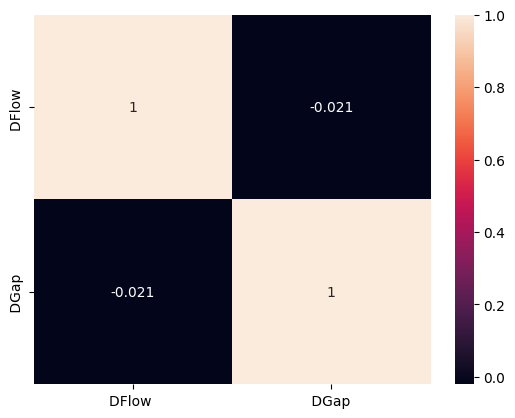

Mean absolute correlation : 0.510256788089923


In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Hanafi_Majid\OneDrive - Dell Technologies\Documents\Thesis\datasets\edm.csv')
df.head()
y_col = [
'DFlow ',
' DGap '

]
y = df[y_col]

y.head()

X=df[df.columns.drop(y)]

y.head()


from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))

# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler

y_train

X_train

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=10, population_size=50,verbosity=2, random_state=123,n_jobs=-1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error'))
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=rfg, transformer=target_transformer)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test)


import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE  is',rmse1)
mae1=mean_absolute_error(y_test, y_pred)
print('MAE is',mae1)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['DFlow ',
' DGap ']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

mean_corr = correlation_mat.abs().mean().mean()
print(f"Mean absolute correlation : {mean_corr}")

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.0638772367233643
                                                                                                                       
Generation 2 - Current best internal CV score: -0.0638772367233643
                                                                                                                       
Generation 3 - Current best internal CV score: -0.06387723672

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.14698080333133773
                                                                                                                       
Generation 2 - Current best internal CV score: -0.14698080333133773
                                                                                                                       
Generation 3 - Current best internal CV score

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.01713895910406952
                                                                                                              

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.036600499173522635
                                                                                                                       
Generation 2 - Current best internal CV score: -0.036600499173522635
                                                                                  

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\L

RMSE  is 0.4776728953161338
MAE is 0.3026607557181179
rmse_per_output: [0.29648625 0.60699151]
arrmse = 0.11226296290956934
Percentage arrmse = 11.23%


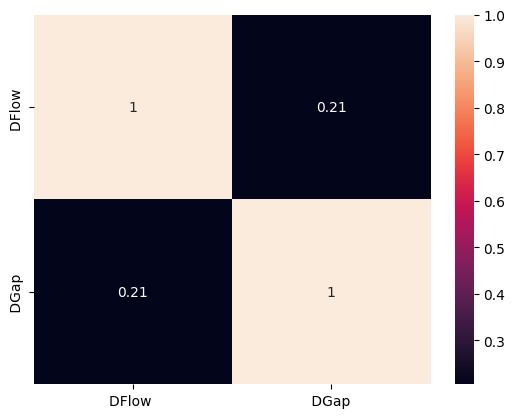

Mean absolute correlation : 0.6027719268065128


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Hanafi_Majid\OneDrive - Dell Technologies\Documents\Thesis\datasets\edm.csv')
df.head()
y_col = [
'DFlow ',
' DGap '

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
#scaler=StandardScaler()
# Choose a transformer for the target variable (e.g., StandardScaler)
target_transformer = scaler

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
#reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
reg = TPOTRegressor(generations=10, population_size=50,verbosity=2, random_state=123,n_jobs=-1, max_time_mins=None, max_eval_time_mins=5, cv=10, scoring='neg_mean_squared_error')

chain = RegressorChain(base_estimator=reg, order=[0,1]).fit(X_train, y_train)
# Create a TransformedTargetRegressor
model = TransformedTargetRegressor(regressor=chain, transformer=target_transformer)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
model.score(X_test, y_test)

import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse2=math.sqrt(mean_squared_error(y_test, y_pred2))
print('RMSE  is',rmse2)
mae2=mean_absolute_error(y_test, y_pred2)
print('MAE is',mae2)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)


def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse2=relative_root_mean_squared_error(y_test,y_pred2)
arrmse2=np.mean(rrmse2)
percentage_average_relative_rmse2 = arrmse2 * 100
print("arrmse =", arrmse2)
print(f"Percentage arrmse = {percentage_average_relative_rmse2:.2f}%")

from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small2=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['DFlow ',
' DGap ']
correlation_mat2 = df_small2.corr('pearson')
sns.heatmap(correlation_mat2, annot = True,yticklabels=features,xticklabels=features)
plt.show()

mean_corr2 = correlation_mat2.abs().mean().mean()
print(f"Mean absolute correlation : {mean_corr2}")

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Hanafi_Majid\OneDrive - Dell Technologies\Documents\Thesis\datasets\edm.csv')
df.head()
y_col = [
'DFlow ',
' DGap '

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      #reg = TPOTRegressor(scorers='neg_mean_squared_error',max_eval_time_seconds=240,  verbose=2, cross_val_predict_cv=10, preprocessing=False )
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      reg = TPOTRegressor(generations=10, population_size=50,verbosity=2, random_state=123,n_jobs=-1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      Xi = np.column_stack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.column_stack([X, y[:, :i]]))
    return y

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.016882960843338436
                                                                                                                       
Generation 2 - Current best internal CV sco

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
                                                                                                                       
Generation 1 - Current best internal CV score: -0.036749872252189994
                                                                                                                       
Generation 2 - Current best internal CV score: -0.035760008042628064
                                                                                                

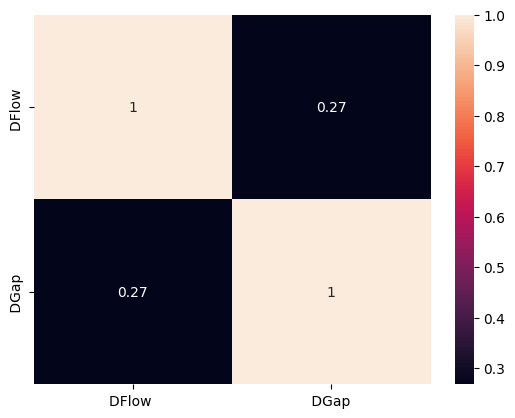

RMSE  is 0.3864865959167846
MAE  is 0.2767316624812315
rmse_per_output: [0.32698019 0.43798143]
relative_root_mean_squared_error = 0.14917868323168373
arrmse = 0.14917868323168373
Percentage arrmse = 14.92%
Mean absolute correlation - Dataset 1: 0.6339336163554878


In [4]:
from tpot import TPOTRegressor
import numpy as np
#from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)
#X = np.dtype('float64')

Ypred2 = reg2.predict(X_test)
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

y_test=scaler.inverse_transform(y_test)
Ypred2=scaler.inverse_transform(Ypred2)

from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small3=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['DFlow ',
' DGap ']
correlation_mat3 = df_small3.corr('pearson')
sns.heatmap(correlation_mat3, annot = True,yticklabels=features,xticklabels=features)
plt.show()

import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

mean_corr3 = correlation_mat3.abs().mean().mean()
print(f"Mean absolute correlation - Dataset 1: {mean_corr3}")

[[       nan 0.04658392]
 [0.04658392        nan]]


C:\Users\Hanafi_Majid\AppData\Local\Temp\ipykernel_3036\3161672800.py:6: RuntimeWarning: divide by zero encountered in arctanh
  return np.arctanh(r)
C:\Users\Hanafi_Majid\AppData\Local\Temp\ipykernel_3036\3161672800.py:18: RuntimeWarning: invalid value encountered in subtract
  z_stat = (z1 - z2) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))


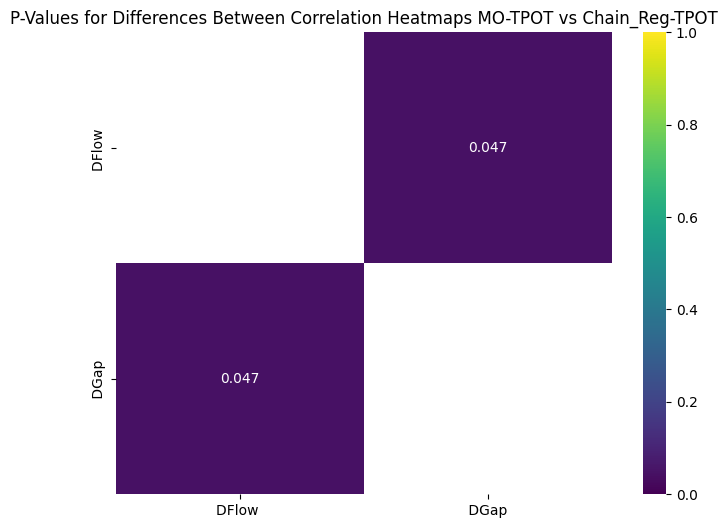

[[       nan 0.56602275]
 [0.56602275        nan]]


C:\Users\Hanafi_Majid\AppData\Local\Temp\ipykernel_3036\3161672800.py:42: RuntimeWarning: divide by zero encountered in arctanh
  return np.arctanh(r)
C:\Users\Hanafi_Majid\AppData\Local\Temp\ipykernel_3036\3161672800.py:54: RuntimeWarning: invalid value encountered in subtract
  z_stat = (z1 - z2) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))


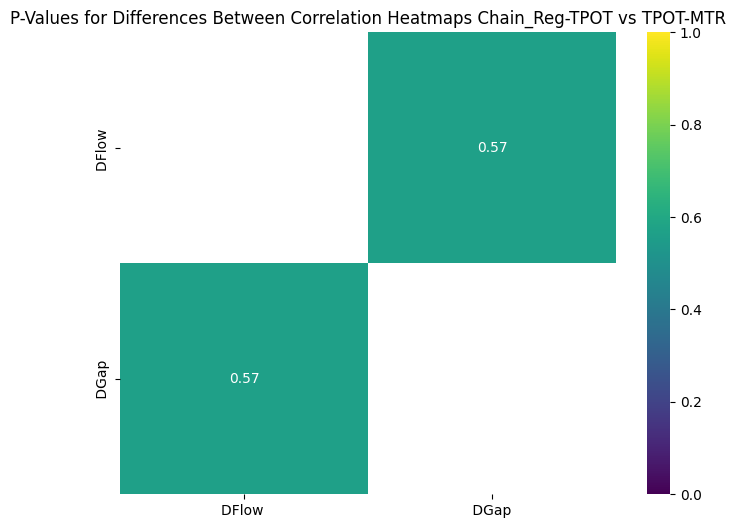

C:\Users\Hanafi_Majid\AppData\Local\Temp\ipykernel_3036\3161672800.py:77: RuntimeWarning: divide by zero encountered in arctanh
  return np.arctanh(r)
C:\Users\Hanafi_Majid\AppData\Local\Temp\ipykernel_3036\3161672800.py:89: RuntimeWarning: invalid value encountered in subtract
  z_stat = (z1 - z2) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))


[[       nan 0.01034788]
 [0.01034788        nan]]


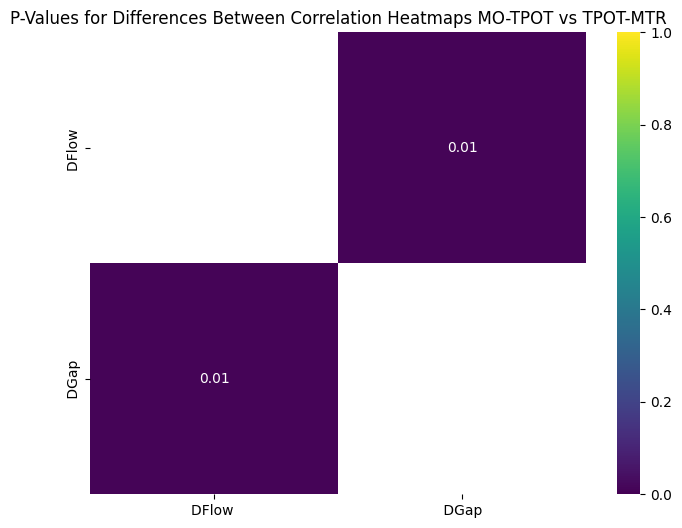

C:\Users\Hanafi_Majid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in arctanh
  result = func(self.values, **kwargs)


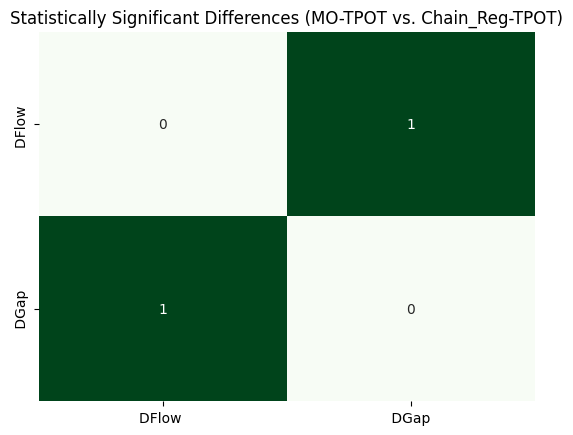

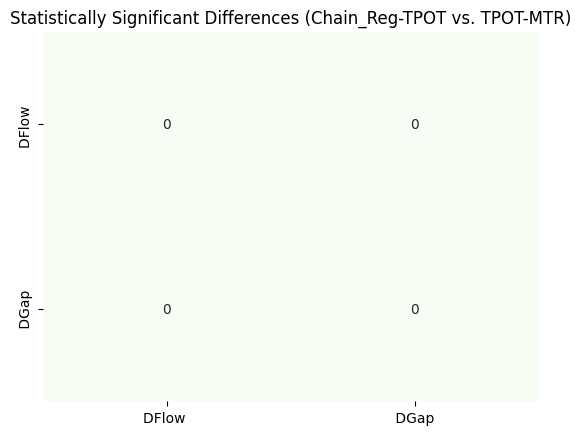

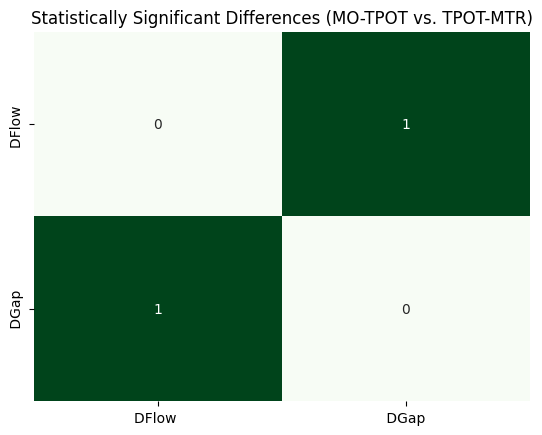

In [5]:
import numpy as np
from scipy.stats import norm

# Fisher z-transform
def fisher_z(r):
    return np.arctanh(r)

# Apply Fisher's z-transform
z1 = fisher_z(correlation_mat.values)  # Convert DataFrame to NumPy array
z2 = fisher_z(correlation_mat2.values)

# Compute z-test statistic for each pair
n1 = len(X) # Number of samples in dataset 1
n2 = len(X)  # Number of samples in dataset 2

# Ensure matching shapes
if z1.shape == z2.shape:
    z_stat = (z1 - z2) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
else:
    raise ValueError("The shapes of correlation matrices do not match!")

from scipy.stats import norm

# Calculate p-values
p_values = 2 * (1 - norm.cdf(abs(z_stat)))
print(p_values)
# Visualize significant differences
plt.figure(figsize=(8, 6))
features=['DFlow ',
' DGap ']
sns.heatmap(p_values, annot=True, cmap='viridis', vmin=0, vmax=1,yticklabels=features,xticklabels=features)
plt.title("P-Values for Differences Between Correlation Heatmaps MO-TPOT vs Chain_Reg-TPOT")
plt.show()



import numpy as np
from scipy.stats import norm

# Fisher z-transform
def fisher_z(r):
    return np.arctanh(r)

# Apply Fisher's z-transform
z1 = fisher_z(correlation_mat2.values)  # Convert DataFrame to NumPy array
z2 = fisher_z(correlation_mat3.values)

# Compute z-test statistic for each pair
n1 = len(X) # Number of samples in dataset 1
n2 = len(X)  # Number of samples in dataset 2

# Ensure matching shapes
if z1.shape == z2.shape:
    z_stat = (z1 - z2) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
else:
    raise ValueError("The shapes of correlation matrices do not match!")

from scipy.stats import norm

# Calculate p-values
p_values = 2 * (1 - norm.cdf(abs(z_stat)))
print(p_values)
# Visualize significant differences
plt.figure(figsize=(8, 6))

sns.heatmap(p_values, annot=True, cmap='viridis', vmin=0, vmax=1,yticklabels=features,xticklabels=features)
plt.title("P-Values for Differences Between Correlation Heatmaps Chain_Reg-TPOT vs TPOT-MTR")
plt.show()



import numpy as np
from scipy.stats import norm

# Fisher z-transform
def fisher_z(r):
    return np.arctanh(r)

# Apply Fisher's z-transform
z1 = fisher_z(correlation_mat.values)  # Convert DataFrame to NumPy array
z2 = fisher_z(correlation_mat3.values)

# Compute z-test statistic for each pair
n1 = len(X) # Number of samples in dataset 1
n2 = len(X)  # Number of samples in dataset 2

# Ensure matching shapes
if z1.shape == z2.shape:
    z_stat = (z1 - z2) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
else:
    raise ValueError("The shapes of correlation matrices do not match!")

from scipy.stats import norm

# Calculate p-values
p_values = 2 * (1 - norm.cdf(abs(z_stat)))
print(p_values)
# Visualize significant differences
plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, cmap='viridis', vmin=0, vmax=1,yticklabels=features,xticklabels=features)
plt.title("P-Values for Differences Between Correlation Heatmaps MO-TPOT vs TPOT-MTR")
plt.show()



import numpy as np

def fisher_z_transform(corr_matrix):
    return np.arctanh(corr_matrix)  # Equivalent to the formula above

z_A = fisher_z_transform(correlation_mat)
z_B = fisher_z_transform(correlation_mat2)
z_C = fisher_z_transform(correlation_mat3)

from scipy.stats import norm

n1, n2 = len(X), len(X)  # Sample sizes
z_diff_AB = (z_A - z_B) / np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
p_values_AB = 2 * (1 - norm.cdf(np.abs(z_diff_AB)))

z_diff_BC = (z_B - z_C) / np.sqrt(1 / (n2 - 3) + 1 / (len(X) - 3))
p_values_BC = 2 * (1 - norm.cdf(np.abs(z_diff_BC)))

z_diff_AC = (z_A - z_C) / np.sqrt(1 / (n1 - 3) + 1 / (len(X) - 3))
p_values_AC = 2 * (1 - norm.cdf(np.abs(z_diff_AC)))


import seaborn as sns
import matplotlib.pyplot as plt



significant_diff = (p_values_AB < 0.05).astype(int)
sns.heatmap(significant_diff, annot=True, cmap='Greens', cbar=False,yticklabels=features,xticklabels=features)
plt.title('Statistically Significant Differences (MO-TPOT vs. Chain_Reg-TPOT)')
plt.show()

significant_diff2 = (p_values_BC < 0.05).astype(int)
sns.heatmap(significant_diff2, annot=True, cmap='Greens', cbar=False,yticklabels=features,xticklabels=features)
plt.title('Statistically Significant Differences (Chain_Reg-TPOT vs. TPOT-MTR)')
plt.show()

significant_diff3 = (p_values_AC < 0.05).astype(int)
sns.heatmap(significant_diff3, annot=True, cmap='Greens', cbar=False,yticklabels=features,xticklabels=features)
plt.title('Statistically Significant Differences (MO-TPOT vs. TPOT-MTR)')
plt.show()